<a href="https://colab.research.google.com/github/bercin-y/Info_Turkey/blob/master/Assignment2_Monty_Hall_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 2

This assignmemt is based on content discussed in module 2 and will work on a solution for the famous Monty Hall game.  Retrieved from https://en.wikipedia.org/wiki/Monty_Hall_problem


## Learning outcomes

- Program a simple simulation to solve a concrete statistical problem
- Develop insight into the Bayesian probabilistic viewpoint
- Recognize that statistical intuition can sometimes be wrong


** Question 1 **
Given below is the description of the problem.  

Suppose you're on a game show and you're given the choice of three doors. 

Behind one door is a car; behind the others, goats. The car and the goats were placed randomly behind the doors before the show.

The rules are:

After you have chosen a door, the door remains closed for the time being. 
The game show host, Monty Hall, who knows what is behind the doors, now has to open one of the two remaining doors, and the door he opens must have a goat behind it. If both remaining doors have goats behind them, he chooses one randomly. 

After Monty opens a door with a goat, he will ask you to decide whether you want to stay with your first choice or to switch to the last remaining door. 
Imagine that you chose Door 1 and the host opens Door 3, which has a goat. 
He then asks you "Do you want to switch to Door Number 2?" Is it to your advantage to change your choice? 

**NOTES:**
1. The player may initially choose any of the three doors (not just Door 1).
2. The host opens a different door revealing a goat (not necessarily Door 3).
3. The host gives the player a second choice between the two remaining unopened doors. 


![image.png](attachment:image.png)

(Source: https://en.wikipedia.org/wiki/Monty_Hall_problem#/media/File:Monty_open_door.svg )

[Monty hall problem ]

- Write Python code to solve the Monty Hall problem. Simulate at least a thousand games using three doors for each strategy and show the results in such a way as to make it easy to compare the effects of each strategy.


In [ ]:
#your work here



*   The highest level of the task to solve the problem
*   Simulate thousand games with the loop (There is two part of the game)
  
  * The first one is set up the game
        * Using the option from list, dictionary, dataframes from pandas,  
        * Simulate 1000 times games

  * The second part is to start playing the game
       * Player choose a door
       * Host eliminate the door
       * Recording each results
       * Player has two options:
         * 1)Staying with the original choice
         * 2)Switching the door

     
  * Show the results 
---

pseudocode
pseudonym - pen name 



In [ ]:
("""  The highest level of the task to solve the problem
# Simulate thousand games with the loop (There is two part of the game)

# The first one is set up the game
  # Define 3 doors
      # Using the option from list, dictionary, dataframes from pandas,  
Doors=pd.DataFrame(columns=["Car","Goat", "Goat"])

  # Simulate 1000 times games
for Doors in range(10):

    # Randomly place the price and goats
    i=random.shuffle(Doors)
    print(i)
    
    # The second part is to start playing the game
     #Player choose a door
    initial_choice_index=random.choice([1,2,3])

    #Host eliminate the door
    eliminate_choice_door=Doors.pop(initial_choice_index)
    Doors.remove("0")

    # Recording each results

  #Player has two options:
   #1)Staying with the original choice
    stay_result=Doors
   #2)Switching the door""")

  

In [44]:
#Starting game's set up and choose the car's door
#Player choose randomly a door
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib as mpl

Doors=pd.DataFrame(np.random.randint(1,4,size=(1000,2)), columns=['Car','Initial_Choice'])
Doors.head()


,Car,Initial_Choice
0,1,2
1,3,3
2,1,3
3,2,2
4,2,1


In [45]:
Doors.loc[(Doors['Car'] ==1) & (Doors['Initial_Choice']==3), 'Eliminate_Door'] = 2
Doors.loc[(Doors['Car'] ==2) & (Doors['Initial_Choice']==3), 'Eliminate_Door'] = 1
Doors.loc[(Doors['Car'] ==2) & (Doors['Initial_Choice']==1), 'Eliminate_Door'] = 3
Doors.loc[(Doors['Car'] ==3) & (Doors['Initial_Choice']==1), 'Eliminate_Door'] = 2
Doors.loc[(Doors['Car'] ==3) & (Doors['Initial_Choice']==2), 'Eliminate_Door'] = 1
Doors.loc[(Doors['Car'] ==1) & (Doors['Initial_Choice']==2), 'Eliminate_Door'] = 3
Doors


,Car,Initial_Choice,Eliminate_Door
0,1,2,3.0
1,3,3,NaN
2,1,3,2.0
3,2,2,NaN
4,2,1,3.0
...,...,...,...
995,1,2,3.0
996,2,3,1.0
997,1,1,NaN
998,1,1,NaN


In [51]:
#Host eliminate the door
for i in range(len(Doors)):
  if (Doors.loc[i,'Car']==3 & Doors.loc[i,'Initial_Choice']==3):
         Doors.loc[i,'Eliminate_Door']=np.random.choice([1,2])
  elif (Doors.loc[i,'Car']==2 & Doors.loc[i,'Initial_Choice']==2):
         Doors.loc[i,'Eliminate_Door']=np.random.choice([1,3])
  elif (Doors.loc[i,'Car']==1 & Doors.loc[i,'Initial_Choice']==1):
         Doors.loc[i,'Eliminate_Door']=np.random.choice([2,3])      
Doors.head(20)
Doors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Car             1000 non-null   int64  
 1   Initial_Choice  1000 non-null   int64  
 2   Eliminate_Door  1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [39]:
#Player has two options:
   #1)Switching the door choice
   #2)Staying with the original choice

#If Player switch the door choice
Doors.loc[(Doors['Eliminate_Door'] ==1) & (Doors['Initial_Choice']==2), 'Switching_door'] = 3
Doors.loc[(Doors['Eliminate_Door'] ==1) & (Doors['Initial_Choice']==3), 'Switching_door'] = 2
Doors.loc[(Doors['Eliminate_Door'] ==2) & (Doors['Initial_Choice']==1), 'Switching_door'] = 3
Doors.loc[(Doors['Eliminate_Door'] ==2) & (Doors['Initial_Choice']==3), 'Switching_door'] = 1
Doors.loc[(Doors['Eliminate_Door'] ==3) & (Doors['Initial_Choice']==1), 'Switching_door'] = 2
Doors.loc[(Doors['Eliminate_Door'] ==3) & (Doors['Initial_Choice']==2), 'Switching_door'] = 1
Doors['Switching_door']=Doors['Switching_door'].astype(int)
Doors.head()

,Car,Initial_Choice,Eliminate_Door,Switching_door
0,2,2,1.0,3
1,1,2,3.0,1
2,3,2,1.0,3
3,2,2,1.0,3
4,2,3,1.0,2


In [40]:
#To show the possibility of switching the door as 1 and 0 (1=Win car, 0=Goat) 

Doors.loc[Doors['Car'] == Doors['Switching_door'], 'Switching_Possibility'] = 1
Doors.loc[Doors['Car'] != Doors['Switching_door'], 'Switching_Possibility'] = 0
Doors['Switching_Possibility']=Doors['Switching_Possibility'].astype(int)
Doors.head()

,Car,Initial_Choice,Eliminate_Door,Switching_door,Switching_Possibility
0,2,2,1.0,3,0
1,1,2,3.0,1,1
2,3,2,1.0,3,1
3,2,2,1.0,3,0
4,2,3,1.0,2,1


In [41]:
#To show the possibility if player will not change their choice

Doors.loc[Doors['Car'] == Doors['Initial_Choice'], 'Stay_Possibility'] = 1
Doors.loc[Doors['Car'] != Doors['Initial_Choice'], 'Stay_Possibility'] = 0
Doors['Stay_Possibility']=Doors['Stay_Possibility'].astype(int)
Doors.head()

,Car,Initial_Choice,Eliminate_Door,Switching_door,Switching_Possibility,Stay_Possibility
0,2,2,1.0,3,0,1
1,1,2,3.0,1,1,0
2,3,2,1.0,3,1,0
3,2,2,1.0,3,0,1
4,2,3,1.0,2,1,0


In [42]:
#To calculate the percentange of winning car chance if player switches the door
Doors["Switching_Possibility"].mean()

0.675

In [43]:
#To calculate the percentange of winning car chance if player stay in the first choice's door
Doors["Stay_Possibility"].mean()

0.325

In [ ]:
""" SCRATCH STUDYING

#Doors.loc[(Doors['Car'] ==1) & (Doors['Initial_Choice']==2), 'Eliminate_Door'] = np.random.choice([1,3])

#Assign random number to some of the rows regarding to the filter 
Doors.loc[(Doors['Car'] ==1) & (Doors['Initial_Choice']==2)]= np.random.choice([1,3])

#Show the values from Initial Choice column
Doors['Initial_Choice']

#Store a random number in Eliminate_Door column when Car and Initial_Choice have the same door number
##)ADD: Store a different random number in Eliminate_Door column for each row
#1) Car=Initial_Choice=1
Doors.loc[((Doors['Car']) ==(Doors['Initial_Choice'])) & (Doors['Initial_Choice']==1)]= x
'Eliminate_Door'=np.random.choice([2,3],size=(len(x),1))
 
 
 replace=True)
Doors['Eliminate_Door']=np.random.choice([2,3],size=(1000,1))
#Create a variable to store a filter
Filter_1 = (Doors['Car'] ==1) & (Doors['Initial_Choice']==1)
Doors.loc[Filter_1]

for i in Doors['Eliminate_Door']:
  i=np.random.choice([2,3],replace=True)
print(Doors['Eliminate_Door'])

  if (Doors['Eliminate_Door']=x):
  print(x)
Doors['Eliminate_Door']
x=random.choice([2,3])
x.iat[1,2]


#Loop the Filter_1 through the rows for choosing a random number 
#Loop through all the dataframe rows and update eliminate door column; one row each time
#Store a different random number in a column loop through all the dataframe rows Eliminate_Door column for each row
for i in range(10) #range(len(Doors)):
  if Eliminate_Door=i
  print(i)

for i in range (10):
  print(i)

#---Car=Initial_Choice=2

#---Car=Initial_Choice=3"""




In [ ]:
"""#Assign a value:
vernon = True

#View the value
vernon

#Test the value
vernon == 5
#---

#Create a variable to store a filter
#my_filter = Doors['Car'] ==1
a=(Doors['Car'] ==1) & (Doors['Initial_Choice']==2)
print(a)
Doors.loc[a] 
type(a)
#Use my filter on the DataFrame
Doors.loc[my_filter]"""

In [ ]:
def winning_possibility(Doors['Initial_Choice','Car']):
    return np.sum(Doors.loc[Doors['Car'] == Doors['Initial_Choice']]/float(len(Doors['Initial_Choice'])))
print("if the player choose the initial choice",winning_possibility(Doors['Initial_Choice','Car']))

SyntaxError: ignored

In [ ]:
nsim = 1000
"""odul = simulasyon_odul(nsim)
tahmin = simulasyon_tahmin(nsim)
kecikapilar = keci_kapi(odul,tahmin)
degistir = tahmin_degistir(tahmin,kecikapilar)"""
prize=Doors.loc(Doors['Car'])(nsim)
guess=Initial_choice(nsim)
goat_doors=Eliminate_Door(prize,guess)
change=Switching_Possibility(guess,goat_doors)
  Switching.append("Switching_Possibility")
  Not_Switching.append("Stay_Possibility")

print("Eğer ilk seçtiği kapıyı değiştirmezse ", kazanma_yuzdesi(tahmin, odul))
print("Eğer ilk seçtiği kapıyı değiştirirse: ", kazanma_yuzdesi(degistir, odul))

In [ ]:
Switching = []
Not_Switching= []
nsim=10000
for ntimes in range(1,10000,20):
  """prize='Car'(nsim)
  guess=Initial_choice(nsim)
  goat_doors=Eliminate_Door(prize,guess)
  change=Switching_Possibility(guess,goat_doors)"""
  Switching.append("Switching_Possibility")
  Not_Switching.append("Stay_Possibility")
    
plt.figure(figsize=(14,10))    
plt.plot(range(1,10000,20),Switching, 'r.', label='Switching')
plt.plot(range(1,10000,20),Not_Switching, 'b.', label='Not_Switching')
plt.xlabel("Simulasion's number")
plt.ylabel('Possibility')
plt.legend()
plt.show()

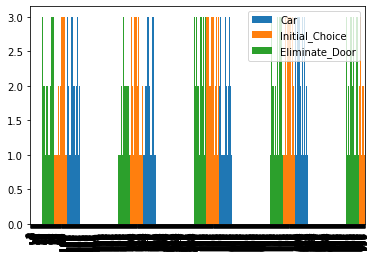

In [52]:
Doors.plot.bar()

In [ ]:
Doors.plot.barh(stacked=True)

In [ ]:
Doors.plot.barh(stacked=True)

In [ ]:
Doors.iloc[999].plot(kind='bar')

In [ ]:
Doors.iloc[5].plot.bar()
plt.axhline(0, color='k')

In [ ]:
# do something many times:
Eliminate_Door=[]
Doors.iloc[1,1]
for i in range(1000):
    if (Doors.loc[((Doors['Car']) ==(Doors['Initial_Choice'])) & (Doors['Initial_Choice']==1)]):
      Eliminate_Door.append(np.random.choice(2,3))
for Doors['Eliminate_Door'] in range(10):
  for i in Doors['Eliminate_Door']:
    i= random.choice([1,3])
    if Doors.loc[((Doors['Car']) ==(Doors['Initial_Choice'])) & (Doors['Initial_Choice']==2),'Eliminate_Door']:
      Doors['Eliminate_Door']==i
      print(i)
Doors['Eliminate_Door']()
print(Doors['Eliminate_Door']) #df1.shape[0] 2 or 3

print(Doors)
df['radon_adj'] = df['radon'].apply(lambda x: random.uniform(0.1, 0.5) if x == 0.5 else x)
Doors['Eliminate_Door']=
Doors.loc[((Doors['Car']) ==(Doors['Initial_Choice'])) & (Doors['Initial_Choice']==2), 'Eliminate_Door']=i
i=Doors.loc[(Doors['Eliminate_Door'])](lambda x: random.uniform(1,3) if x==2 else x)
# Doors.loc[((Doors['Car']) ==(Doors['Initial_Choice'])) & (Doors['Initial_Choice']==2), 'Eliminate_Door'] = 3
Doors.loc[((Doors['Car']) ==(Doors['Initial_Choice'])) & (Doors['Initial_Choice']==2), 'Eliminate_Door'] = np.random.choice([2,3], replace = True)
Doors
# Doors.loc[((Doors['Car']) ==(Doors['Initial_Choice'])) & (Doors['Initial_Choice']==3), 'Eliminate_Door'] = 1 
for Doors['Eliminate_Door'] in range(10):
  Doors=Doors.append({random.choice([1,2]): Doors['Eliminate_Door']}, ignore_index=True) 
  if Doors.loc[((Doors['Car']) ==(Doors['Initial_Choice'])) & (Doors['Initial_Choice']==3)]:
     print(Doors)                
#Doors['Eliminate_Door']=Doors['Eliminate_Door'].astype(int)"""

3

In [ ]:
"""
cond1=Doors.Car.eq(1) & Doors.Initial_Choice.eq(1)
cond2=Doors.Car.eq(2) & Doors.Initial_Choice.eq(2)
cond3=Doors.Car.eq(3) & Doors.Initial_Choice.eq(3)

range1 = random.choice([2,3])
range2 = random.choice([1,3])
range3 = random.choice([1,2])

Doors=Doors.assign(Eliminate_Door=np.select([cond1, cond2,cond3], [range1, range2,range3]))

Doors = pd.concat([Doors]*3)
Doors.head(50)
Doors=Doors.assign(Eliminate_Door=np.select([cond1, cond2,cond3], [range1, range2,range3]))
Doors.head()

Initial_Choice']==2), 'Eliminate_Door']=np.random.randint([1,3],size=(1000,))"""